In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Weightless neural networks (WNNs)
from wisard import Wisard

# OpenCV 
#import cv2
import torchvision
import torchvision.datasets as datasets
import torch
%matplotlib inline

In [2]:
def load_data():
    train_data = datasets.USPS(root='./dataset/USPS/', train=True, download=True)
    test_data = datasets.USPS(root='./dataset/USPS/', train=False, download=True)
    
    X_train = []
    y_train = []
    X_test = []
    y_test = []
   
    for x, y in tqdm(train_data, ncols=100, desc="Loading USPS train data"):
        X_train.append(np.asarray(x).flatten())
        y_train.append(y)

    for x, y in tqdm(test_data, ncols=100, desc="Loading USPS test data"):
        X_test.append(np.asarray(x).flatten())
        y_test.append(y)

    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)


In [3]:
X_train, y_train, X_val, y_val = load_data()

print('Number of training samples: %s ' % len(X_train))
print('Number of test samples: %s ' % len(X_val))
classes = np.unique(y_train)
print('Classes:', classes)    
print('Train Class Distribution: %s' % np.bincount(y_train))
y_val_bin = np.bincount(y_val)
print('Test Class Distribution: %s' % y_val_bin)

Loading USPS test data: 100%|████████████████████████████████| 2007/2007 [00:00<00:00, 32203.15it/s]


Number of training samples: 7291 
Number of test samples: 2007 
Classes: [0 1 2 3 4 5 6 7 8 9]
Train Class Distribution: [1194 1005  731  658  652  556  664  645  542  644]
Test Class Distribution: [359 264 198 166 200 160 170 147 166 177]


In [4]:
def train_test_wisard(X_train, y_train, X_val, y_val, entrySize, addr):
    wsd = Wisard(num_of_htables=entrySize//addr, input_addr_length=addr)
    
    print(f'num_of_htables={entrySize//addr}')
    print(f'entrySize={entrySize}')
    print(f'input_addr_length={addr}')
    
    start_time = time.time()
    #train loop
    for i, x in enumerate(tqdm(X_train, ncols=100, desc="Training")):        
        wsd.train(x, classes[y_train[i]])
    end_time = time.time()
    train_time = end_time - start_time
    
    y_pred = np.zeros(len(y_val))
    acertos = 0

    
    #test loop
    for i, x in enumerate(tqdm(X_val, ncols=100, desc=" Testing")):                        
        (disc, acc, conf) = wsd.classify(x)
        y_pred[i] = disc

        if y_pred[i] == y_val[i]:
            acertos += 1

    
    accuracy = acertos/len(X_val)      

    cm = confusion_matrix(y_val, y_pred, labels=classes)
    
    return accuracy, cm, train_time


num_of_htables=128
entrySize=256
input_addr_length=2


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:01<00:00, 1874.30it/s]


Accuracy:   0.11
Total Training Execution Time: 3.00 seconds


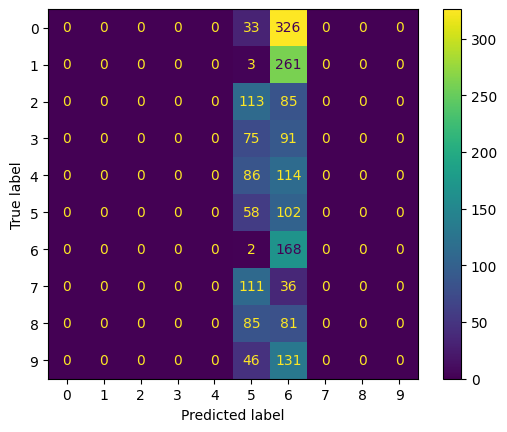

num_of_htables=64
entrySize=256
input_addr_length=4


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 3111.91it/s]


Accuracy:   0.51
Total Training Execution Time: 1.76 seconds


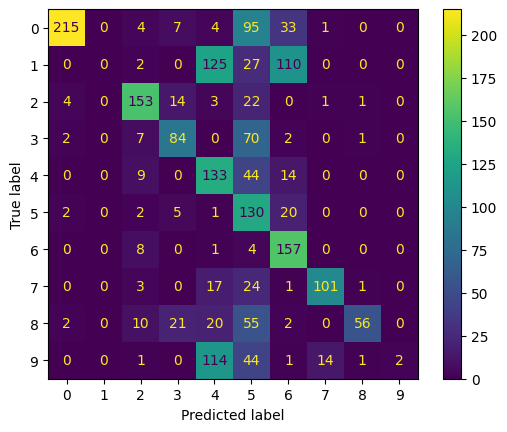

num_of_htables=42
entrySize=256
input_addr_length=6


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 3425.92it/s]


Accuracy:   0.86
Total Training Execution Time: 1.61 seconds


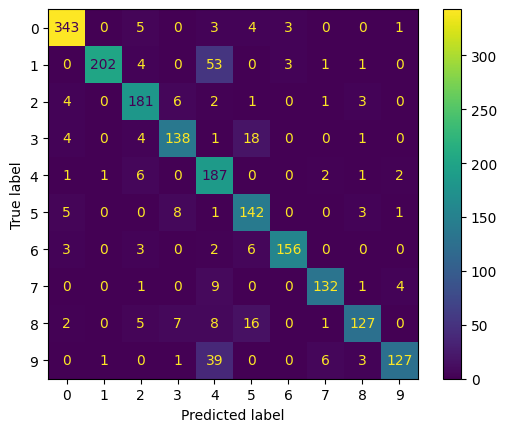

num_of_htables=32
entrySize=256
input_addr_length=8


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 4306.88it/s]


Accuracy:   0.90
Total Training Execution Time: 1.36 seconds


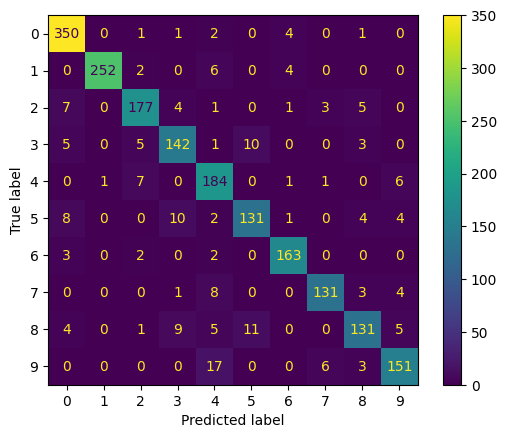

num_of_htables=25
entrySize=256
input_addr_length=10


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 4109.36it/s]


Accuracy:   0.84
Total Training Execution Time: 1.37 seconds


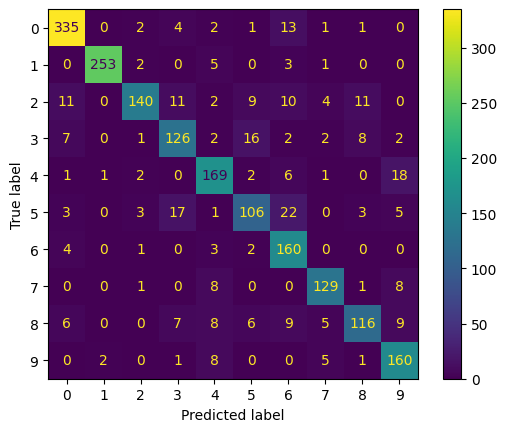

num_of_htables=21
entrySize=256
input_addr_length=12


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 4190.71it/s]


Accuracy:   0.69
Total Training Execution Time: 1.34 seconds


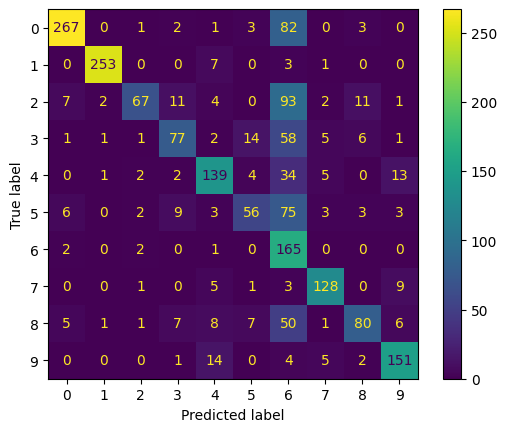

num_of_htables=18
entrySize=256
input_addr_length=14


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 4412.44it/s]


Accuracy:   0.50
Total Training Execution Time: 1.24 seconds


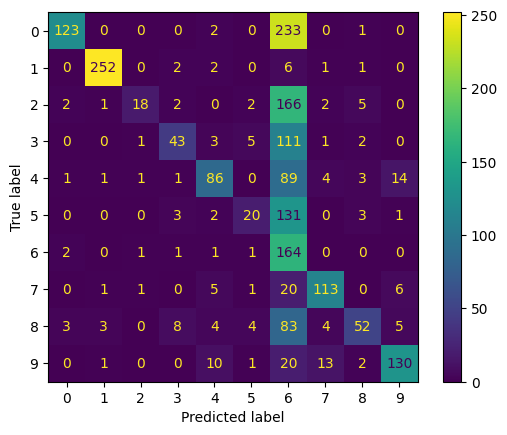

num_of_htables=16
entrySize=256
input_addr_length=16


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 4133.70it/s]


Accuracy:   0.37
Total Training Execution Time: 1.31 seconds


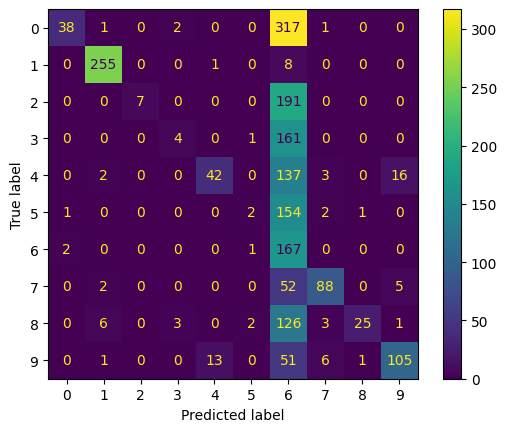

num_of_htables=14
entrySize=256
input_addr_length=18


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 5211.56it/s]


Accuracy:   0.31
Total Training Execution Time: 1.30 seconds


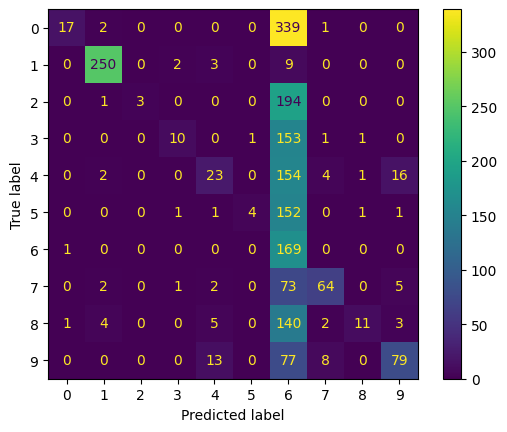

num_of_htables=12
entrySize=256
input_addr_length=20


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 5345.50it/s]


Accuracy:   0.25
Total Training Execution Time: 1.18 seconds


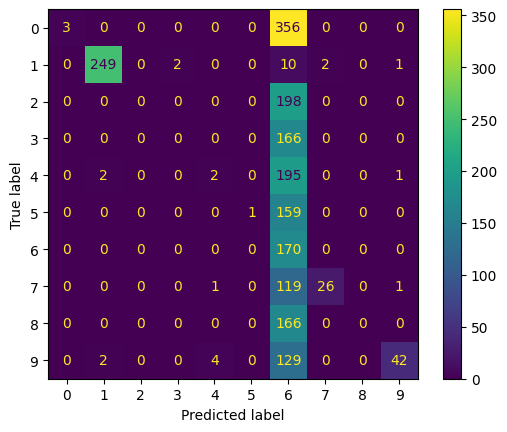

num_of_htables=11
entrySize=256
input_addr_length=22


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 5673.02it/s]


Accuracy:   0.24
Total Training Execution Time: 1.10 seconds


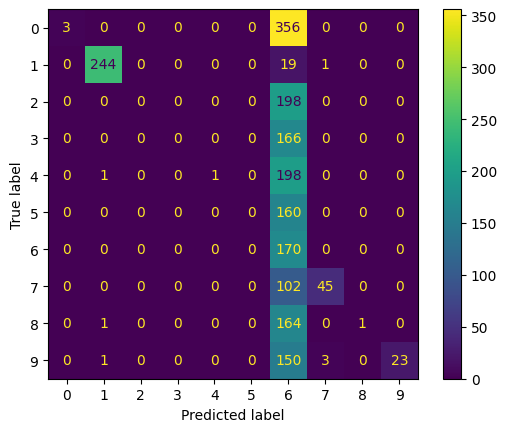

num_of_htables=10
entrySize=256
input_addr_length=24


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 5754.99it/s]


Accuracy:   0.22
Total Training Execution Time: 1.06 seconds


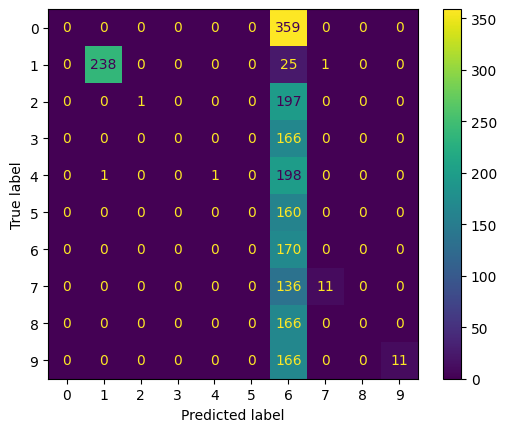

num_of_htables=9
entrySize=256
input_addr_length=26


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 5888.35it/s]


Accuracy:   0.21
Total Training Execution Time: 1.07 seconds


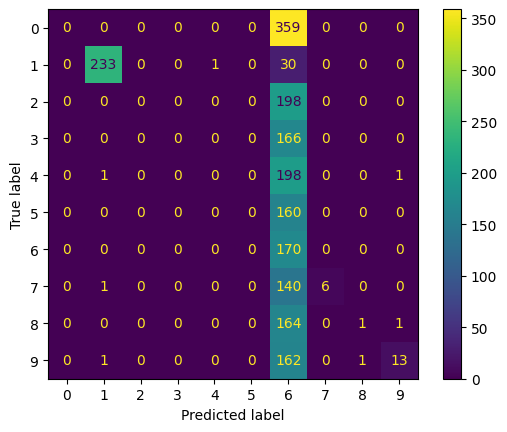

num_of_htables=9
entrySize=256
input_addr_length=28


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 5792.01it/s]


Accuracy:   0.20
Total Training Execution Time: 1.13 seconds


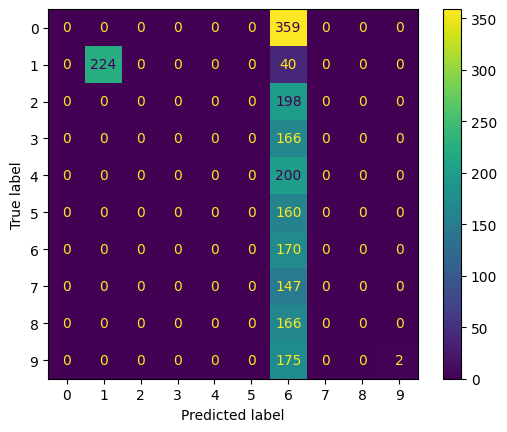

num_of_htables=8
entrySize=256
input_addr_length=30


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 5786.17it/s]


Accuracy:   0.19
Total Training Execution Time: 1.07 seconds


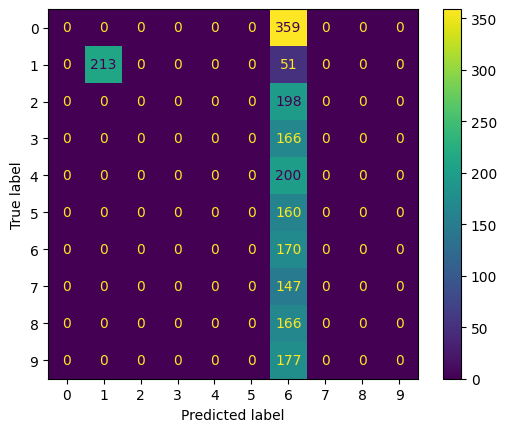

num_of_htables=8
entrySize=256
input_addr_length=32


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 5724.32it/s]


Accuracy:   0.18
Total Training Execution Time: 1.14 seconds


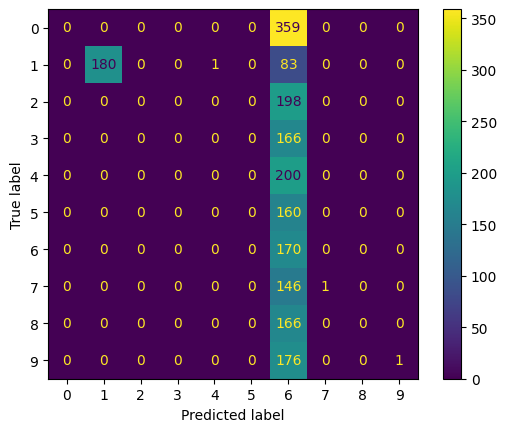

num_of_htables=7
entrySize=256
input_addr_length=34


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 6241.99it/s]


Accuracy:   0.17
Total Training Execution Time: 1.01 seconds


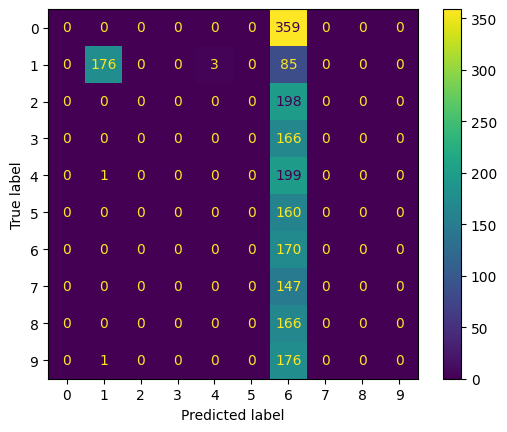

num_of_htables=7
entrySize=256
input_addr_length=36


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 5931.48it/s]


Accuracy:   0.13
Total Training Execution Time: 1.12 seconds


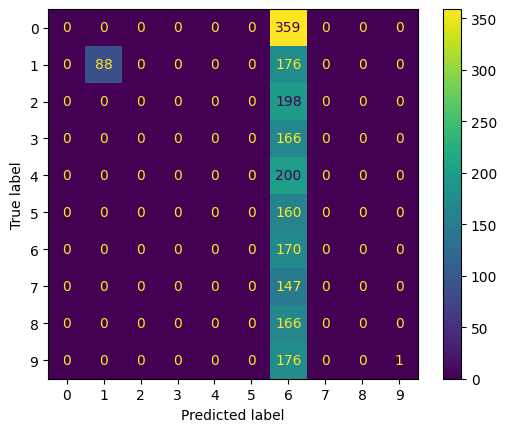

num_of_htables=6
entrySize=256
input_addr_length=38


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 6827.67it/s]


Accuracy:   0.14
Total Training Execution Time: 0.97 seconds


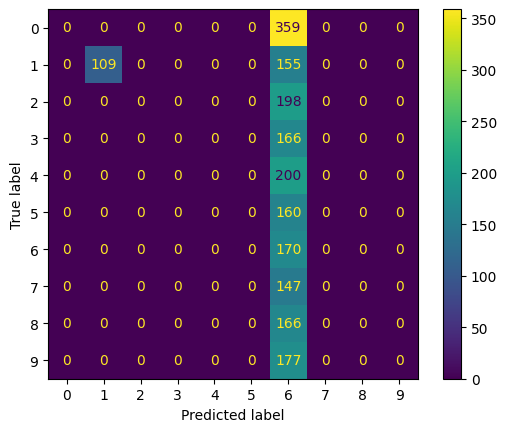

num_of_htables=6
entrySize=256
input_addr_length=40


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 6323.05it/s]


Accuracy:   0.12
Total Training Execution Time: 1.01 seconds


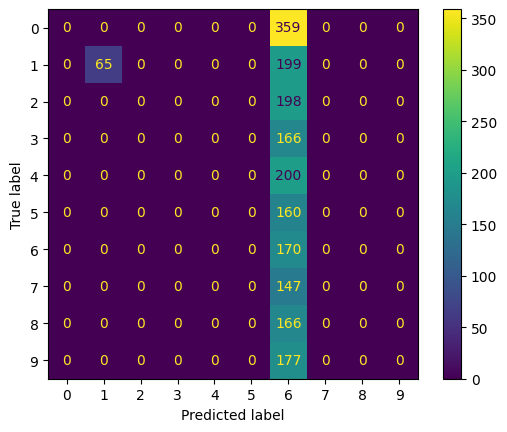

num_of_htables=6
entrySize=256
input_addr_length=42


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 5619.38it/s]


Accuracy:   0.12
Total Training Execution Time: 1.08 seconds


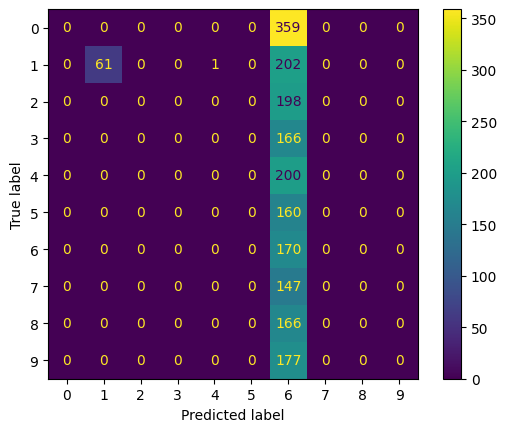

num_of_htables=5
entrySize=256
input_addr_length=44


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 6580.66it/s]


Accuracy:   0.09
Total Training Execution Time: 0.95 seconds


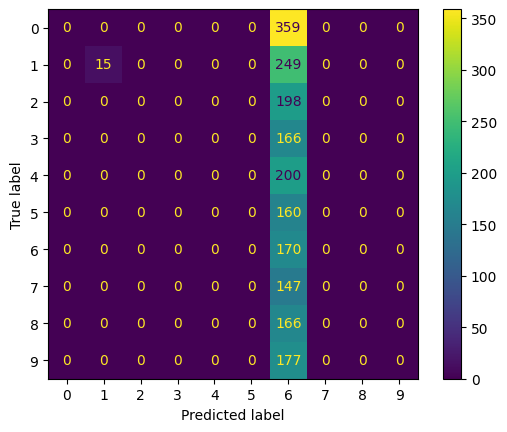

num_of_htables=5
entrySize=256
input_addr_length=46


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 6216.26it/s]


Accuracy:   0.13
Total Training Execution Time: 1.02 seconds


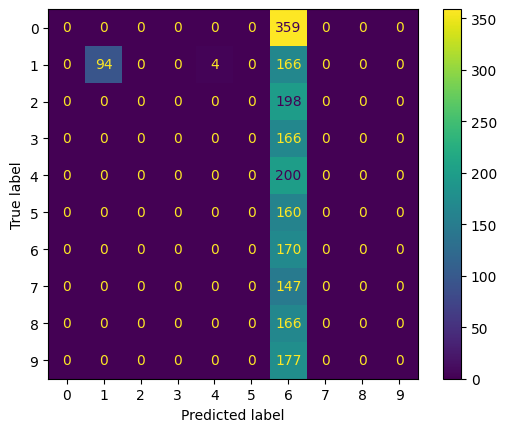

num_of_htables=5
entrySize=256
input_addr_length=48


 Testing: 100%|███████████████████████████████████████████████| 2007/2007 [00:00<00:00, 6187.69it/s]


Accuracy:   0.10
Total Training Execution Time: 1.04 seconds


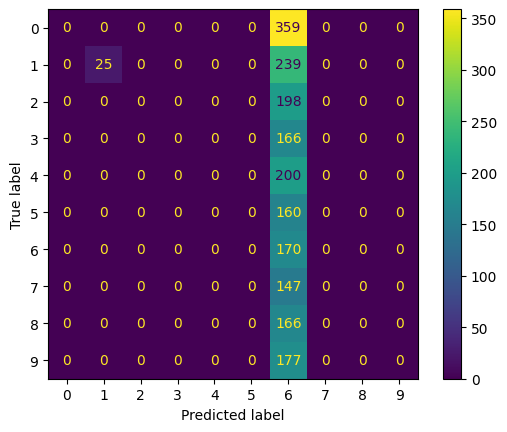

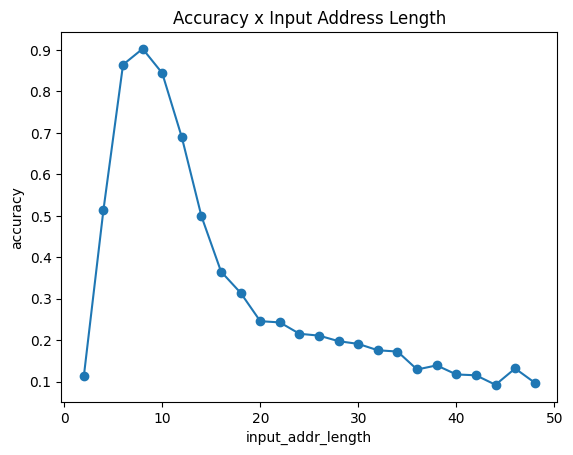

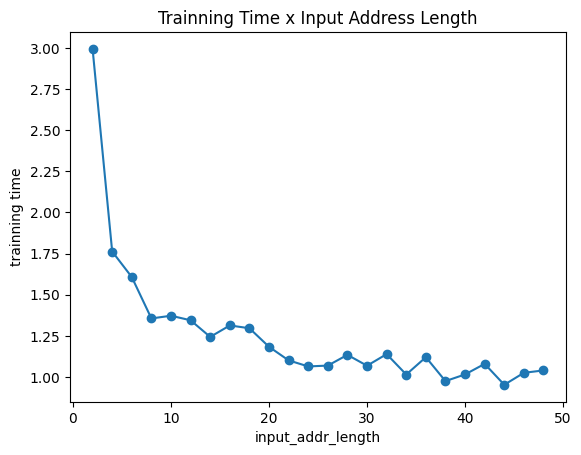

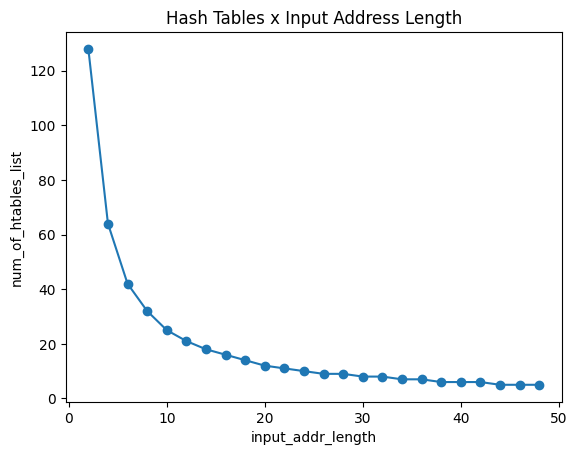

 input_addr_length  num_of_htables  accuracy  trainning_time
                 2             128  0.112606        2.995214
                 4              64  0.513702        1.762182
                 6              42  0.864474        1.606784
                 8              32  0.902840        1.355049
                10              25  0.844046        1.371452
                12              21  0.689088        1.343854
                14              18  0.498754        1.242703
                16              16  0.365222        1.312429
                18              14  0.313901        1.295418
                20              12  0.245640        1.182552
                22              11  0.242651        1.099976
                24              10  0.215247        1.063114
                26               9  0.210762        1.068284
                28               9  0.197309        1.133513
                30               8  0.190832        1.067471
                32      

In [5]:

# Definir a lista de valores de addr
addr_list = list(range(2, 49, 2))
#addr_list = [8, 16, 24]

# Listas para armazenar as accuracies e as tabelas de confusão
accuracy_list = []
cm_list = []
ttime_list = []
num_of_htables_list = []

# Loop para testar para cada valor de addr
for addr in addr_list:
    # Executar a função train_test_wisard
    accuracy, cm, ttime = train_test_wisard(entrySize=X_train[0].shape[0], addr=addr, 
                                     X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)
    
    # Adicionar a accuracy e a tabela de confusão à lista
    accuracy_list.append(accuracy)
    print('Accuracy: %6.2f' % (accuracy))
    ttime_list.append(ttime)
    print("Total Training Execution Time: {:.2f} seconds".format(ttime))
    cm_list.append(cm)
    
    num_of_htables_list.append(X_train[0].shape[0]//addr)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    plt.show()
    

# Plotar o gráfico de Accuracy x Input Address Length
plt.plot(addr_list, accuracy_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('accuracy')
plt.title('Accuracy x Input Address Length')
plt.show()


# Plotar o gráfico de Accuracy x Input Address Length
plt.plot(addr_list, ttime_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('trainning time')
plt.title('Trainning Time x Input Address Length')
plt.show()

# Plotar o gráfico de Accuracy x num_of_htables_list
plt.plot(addr_list, num_of_htables_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('num_of_htables_list')
plt.title('Hash Tables x Input Address Length')
plt.show()

# Criar e Mostrar tabela 
table_data = []
for i, addr in enumerate(addr_list):
    row = [addr, accuracy_list[i]]
    table_data.append(row)
table_data = {'input_addr_length': addr_list, 'num_of_htables': num_of_htables_list, 
              'accuracy': accuracy_list, 'trainning_time': ttime_list}
df = pd.DataFrame(table_data)
print(df.to_string(index=False))